In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
from analysis_routines import * 
from ploting_routines import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [4]:
temp, pres, date = load_time_series('processed/AGL_20181116_chain.nc')

In [5]:
df_ci = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
df_c = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fc.csv')
df_s = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_s.csv')

In [7]:
df_AGL = load_buoy_series('AGL_ocean_meteo_20181181.nc')

In [21]:
def plot_AGL_data(df, var, lims=[None, None]):
    if isinstance(lims[0], datetime):
        lims[0] = date_to_idx(df.index, lims[0])

    if isinstance(lims[1], datetime):
        lims[1] = date_to_idx(df.index, lims[1])
        
    var_arr = df[var][lims[0]:lims[1]]
    date = df.index[lims[0]:lims[1]]
    

    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    
    fig, ax = plt.subplots(figsize=(7, 3.75))
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.plot(date, var_arr)
    fig.tight_layout()
    plt.show()
    

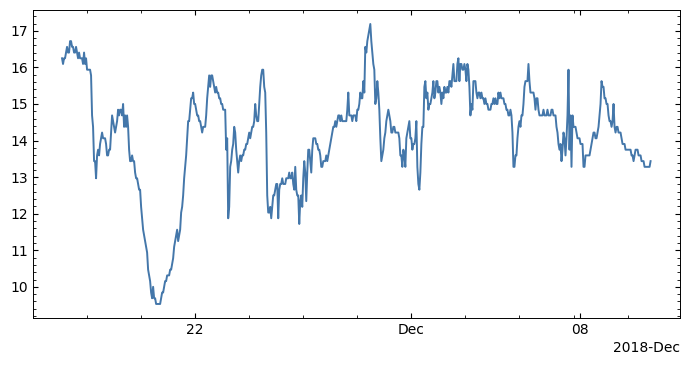

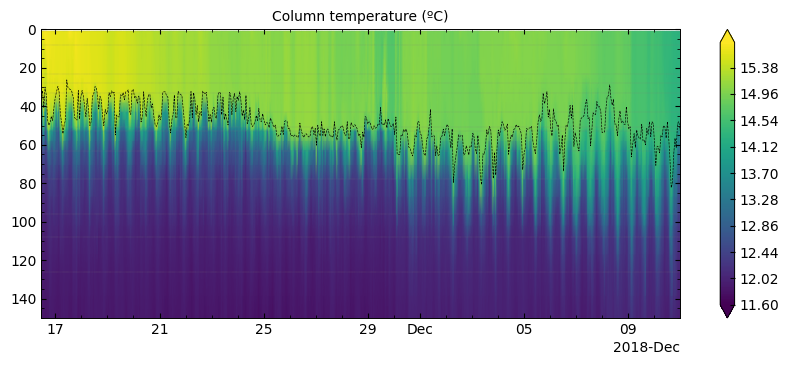

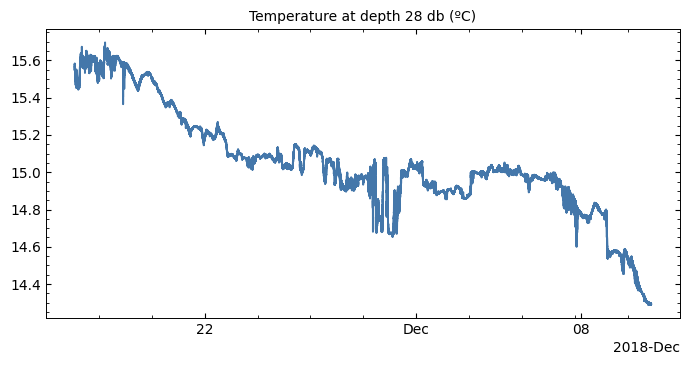

In [32]:
date_0 = datetime(2018, 12, 11)
plot_AGL_data(df_AGL, 'air_tem', lims=[0, date_0])
plot_column_temperature(temp, date, pres, df_ci, lims=[0, date_0], ylims=[150, 0])
#plot_AGL_data(df_AGL, 'hum', lims=[0, date_0])
plot_thermistor_temperature(temp, pres, date, 3, lims=[0, date_0])
#plot_AGL_data(df_AGL, 'wind_speed', lims=[0, date_0])


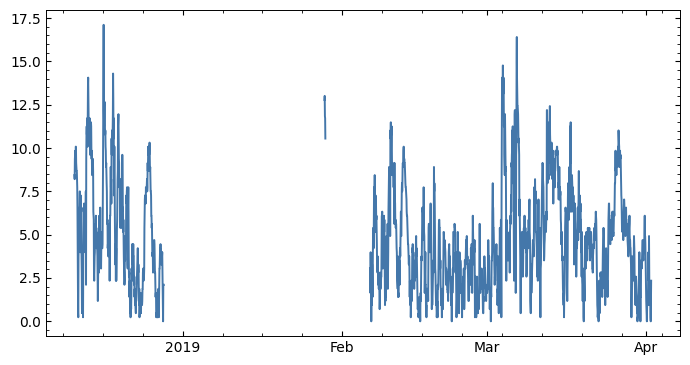

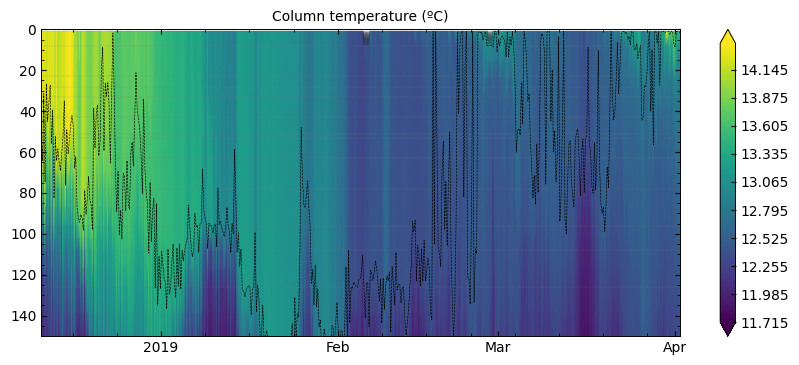

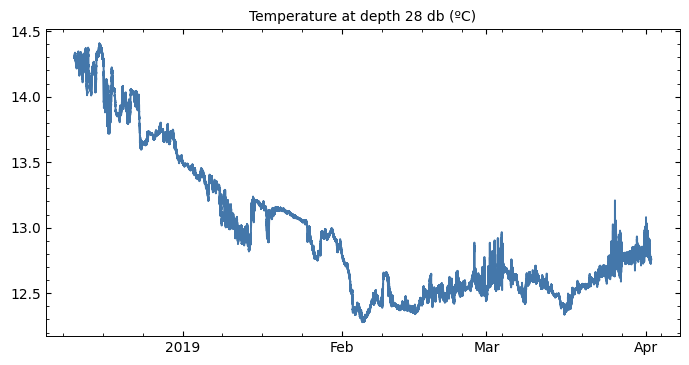

In [38]:
date_1 = datetime(2018, 12, 11)
date_2 = datetime(2019, 4, 2)
plot_AGL_data(df_AGL, 'wind_speed', lims=[date_1, date_2])
plot_column_temperature(temp, date, pres, df_ci, lims=[date_1, date_2], ylims=[150, 0])
#plot_AGL_data(df_AGL, 'hum', lims=[0, date_0])
plot_thermistor_temperature(temp, pres, date, 3, lims=[date_1, date_2])
#plot_AGL_data(df_AGL, 'wind_speed', lims=[0, date_0])
